### Elongate time series for 10000 years

In [1]:
import os
import logging 
import sys

# Libs
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
prescribe_years = pd.Series(data=np.tile(np.arange(2399,2500,1),200),
                                    index=np.arange(0,20200,1))

In [ ]:
rgi='11'

In [ ]:
_d = xr.open_mfdataset(f'output/RGI{rgi}/run_random_climate_from2500_using2399_2499_gfdl-esm2m_stab_T15_initial_stab_T15_bc_1980_2019_rgi{rgi}_*.nc')
with xr.open_mfdataset(f'output/RGI{rgi}/run_hydro*_gfdl-esm2m_stab_T15_endyr_2500_bc_1980_2019_rgi{rgi}_*.nc') as ds:
    d15 = ds.volume.load()

In [ ]:
xr.open_dataset('output/provide_reg/w5e5_gcm_merged_from_2000_bc_1980_2019/P01/random_climate_from2500_using2399_2499_provide_reg_P01_initial_zero_w5e5_gcm_merged_from_2000_bc_1980_2019.nc')

/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 928 times more chunks
  return self.array[key]
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 928 times more chunks
  return self.array[key]
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 928 times more chunks
  return self.array[key]
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 928 times more chunks
  return self.array[key]
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 921 times more chunks
  ret

ValueError: num must be 1 <= num <= 16, not 17

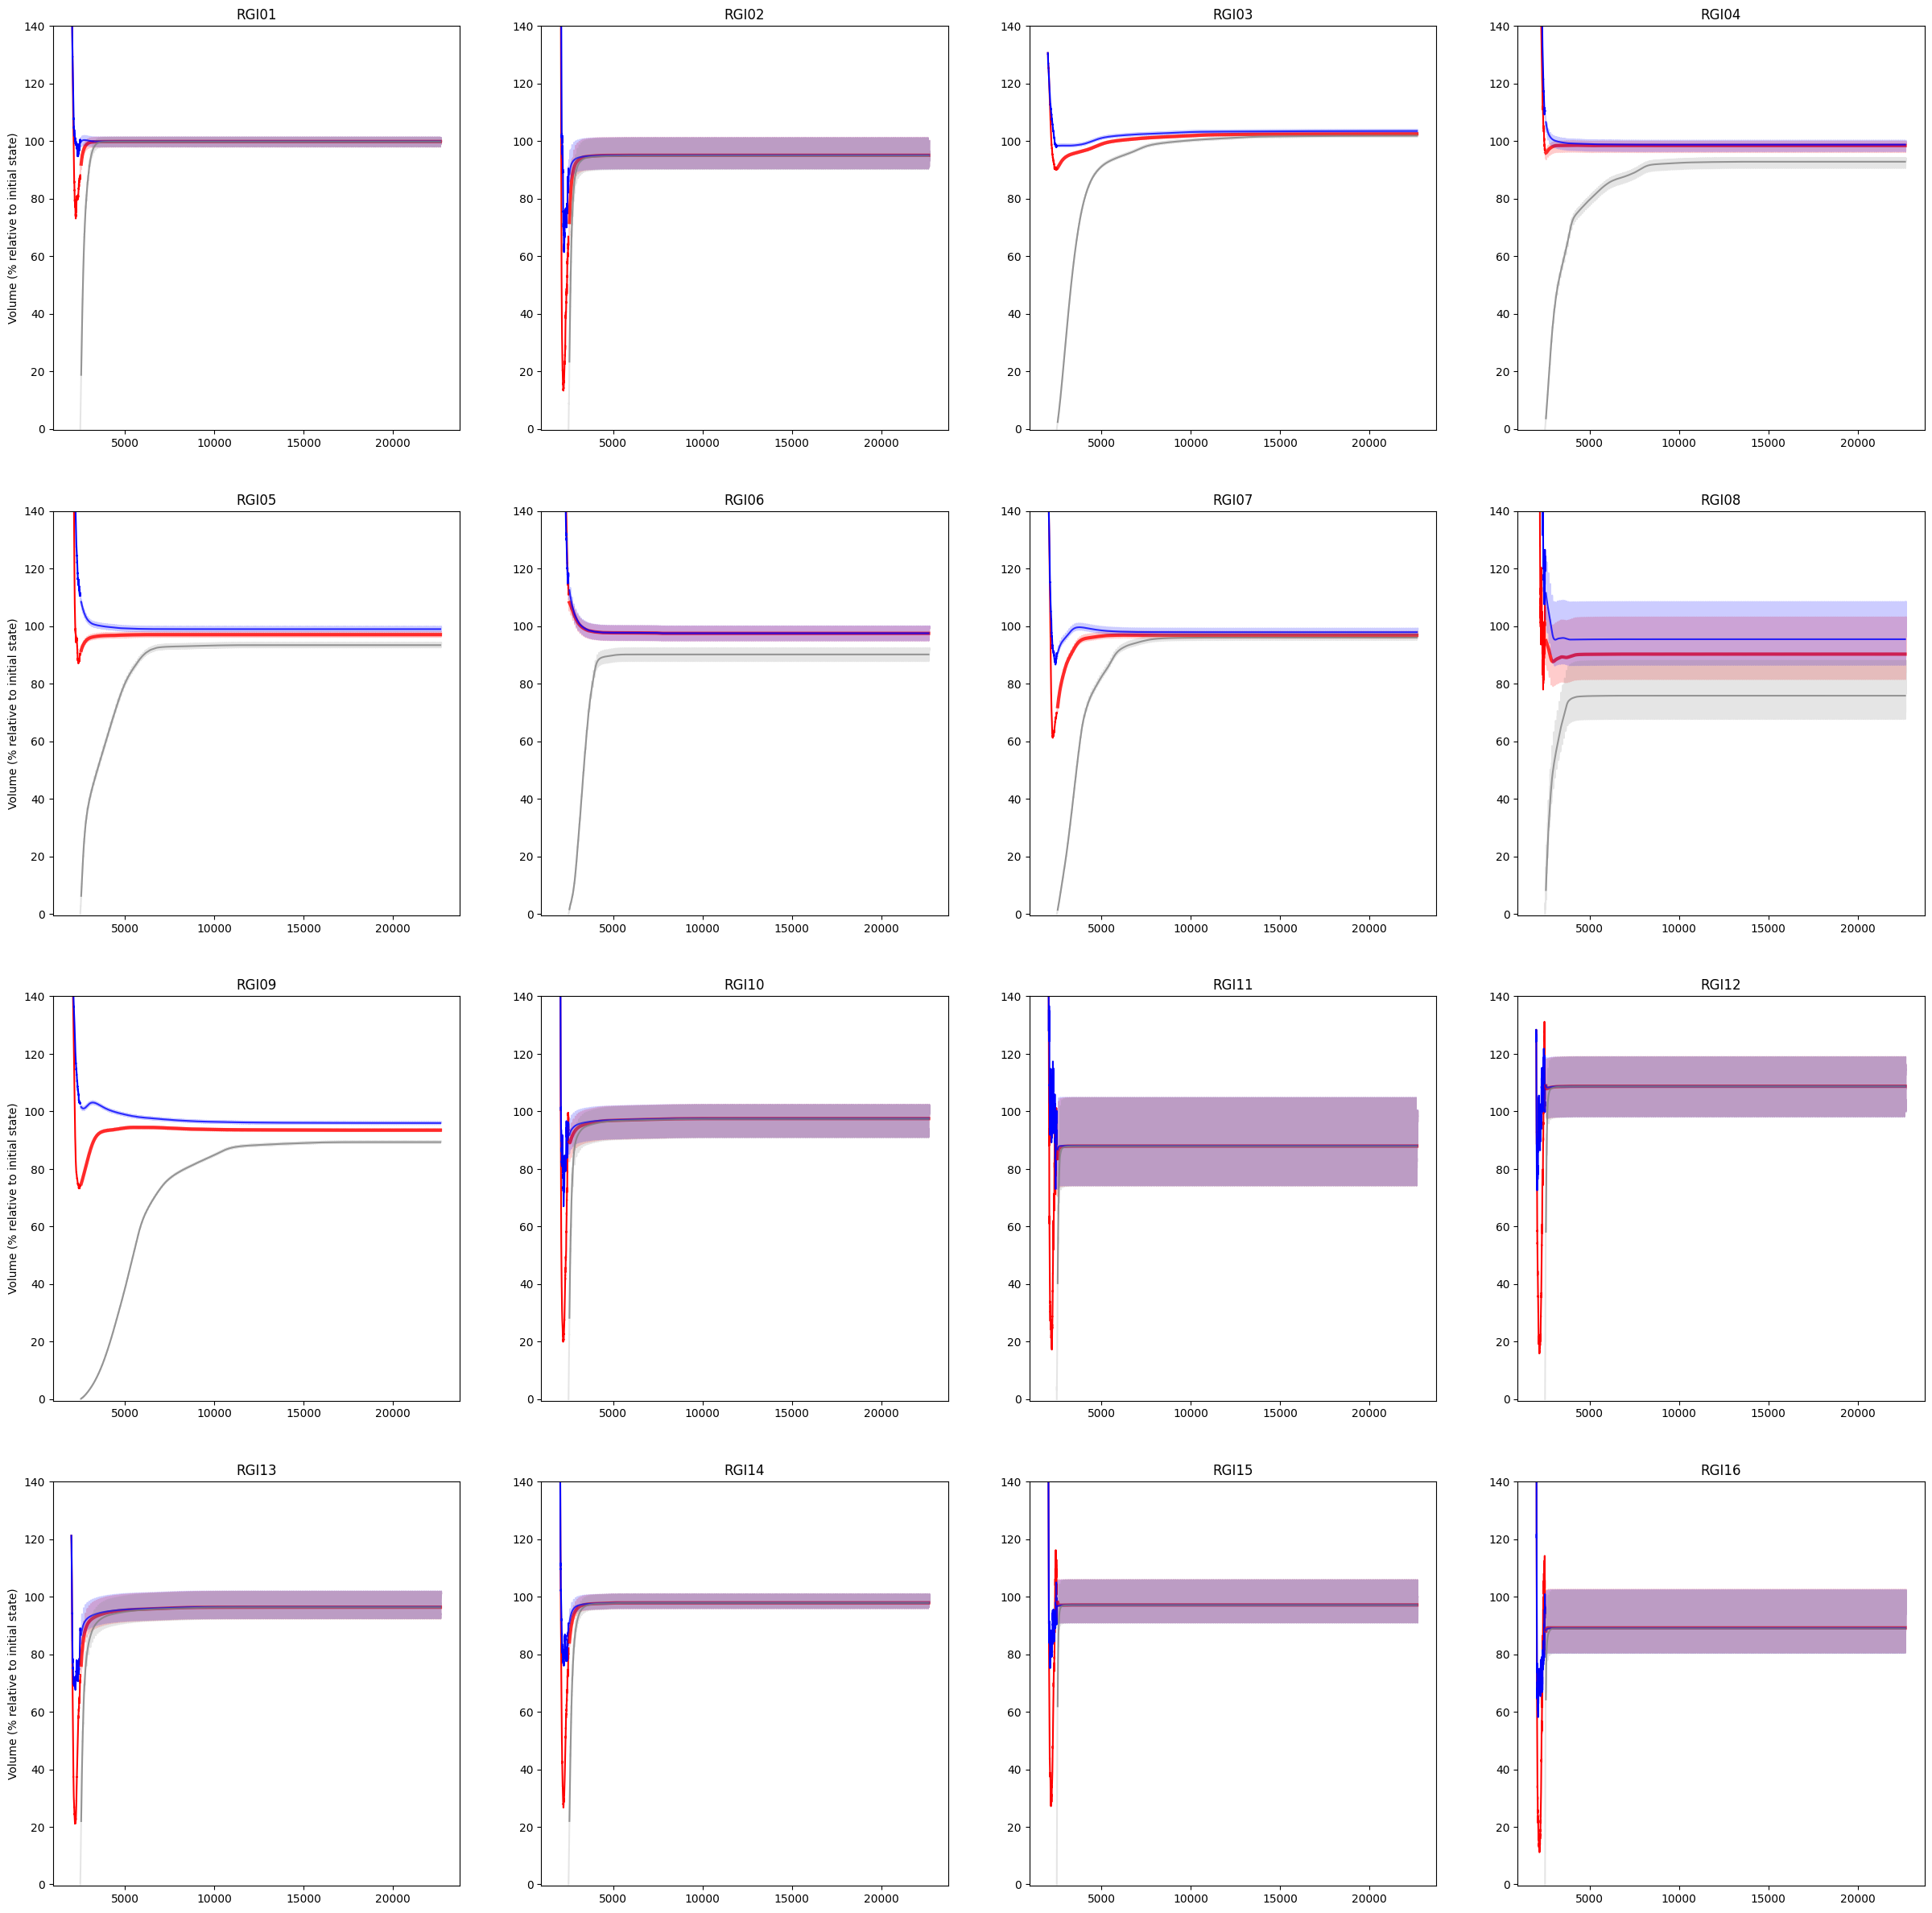

In [33]:
plt.rc({'font',24}) 
plt.figure(figsize=(30,30))
for rgi in np.arange(1,20,1):
    plt.subplot(4,4,rgi)
    if rgi in [1,5,9,13]:
        plt.ylabel('Volume (% relative to initial state)')
    rgi = f'{rgi:02}'

    with xr.open_mfdataset(f'output/RGI{rgi}/run_hydro*_gfdl-esm2m_oversh_T30OS15_endyr_2500_bc_1980_2019_rgi{rgi}_*.nc') as ds:
        d30OS15 = ds.volume.load()
    with xr.open_mfdataset(f'output/RGI{rgi}/run_hydro*_gfdl-esm2m_stab_T15_endyr_2500_bc_1980_2019_rgi{rgi}_*.nc') as ds:
        d15 = ds.volume.load()
    dr30OS15 = xr.open_mfdataset(f'output/RGI{rgi}/run_random_climate_from2500_using2399_2499_gfdl-esm2m_stab_T15_initial_oversh_T30OS15_bc_1980_2019_rgi{rgi}_*.nc')
    dr15 = xr.open_mfdataset(f'output/RGI{rgi}/run_random_climate_from2500_using2399_2499_gfdl-esm2m_stab_T15_initial_stab_T15_bc_1980_2019_rgi{rgi}_*.nc')
    drzero_initial = xr.open_mfdataset(f'output/RGI{rgi}/run_random_climate_from2500_using2399_2499_gfdl-esm2m_stab_T15_initial_zero_bc_1980_2019_rgi{rgi}_*.nc')
    
    rgi_w0 = drzero_initial.dropna(dim='rgi_id').rgi_id.values
    rgi_w1 = dr30OS15.dropna(dim='rgi_id').rgi_id.values
    rgi_w2 = dr15.dropna(dim='rgi_id').rgi_id.values
    
    rgi_w = list(set(rgi_w0).intersection(set(rgi_w1)).intersection(set(rgi_w2)))
    init_vol = dr15.sel(rgi_id=rgi_w).sum(dim='rgi_id').volume.sel(time=2020)/100 # to have it in percent at the end
    plt.plot(d30OS15.time, d30OS15.sel(rgi_id=rgi_w).sum(dim='rgi_id')/init_vol, color='red')
    plt.plot(d15.time, d15.sel(rgi_id=rgi_w).sum(dim='rgi_id')/init_vol, color='blue')
    
    
    dr30OS15_sum = (dr30OS15.sel(rgi_id=rgi_w).sum(dim='rgi_id').volume.sel(time=slice(0,20201))/init_vol).load()
    dr15_sum = (dr15.sel(rgi_id=rgi_w).sum(dim='rgi_id').volume.sel(time=slice(0,20201))/init_vol).load()
    drzero_initial_sum = (drzero_initial.sel(rgi_id=rgi_w).sum(dim='rgi_id').volume.sel(time=slice(0,20201))/init_vol).load()

    plt.plot(np.arange(2500,20201+2500,1),dr30OS15_sum, color='red', alpha = 0.2)
    plt.plot(np.arange(2500,20201+2500,1), 
             dr30OS15_sum.rolling(time=101, center=True).mean(),
            color='red', lw=3, alpha=0.8)
    plt.plot(np.arange(2500,20201+2500,1),dr15_sum, color='blue', alpha = 0.2)

    #plt.plot(np.arange(2500,7001,1),dr25OS15.sel(rgi_id=rgi_w).sum(dim='rgi_id').volume, color='orange', alpha = 0.5)
    #plt.plot(np.arange(2500,7001,1),dr20OS15.sel(rgi_id=rgi_w).sum(dim='rgi_id').volume, color='cyan', alpha = 0.5)
    plt.plot(np.arange(2500,20201+2500,1),
             dr15_sum.rolling(time=101, center=True).mean(), color='blue', alpha = 0.8)
    plt.plot(np.arange(2500,20201+2500,1),
             drzero_initial_sum, color='grey', alpha = 0.2)
    plt.plot(np.arange(2500,20201+2500,1),
                 drzero_initial_sum.rolling(time=101, center=True).mean(),
             color='grey', alpha = 0.8)
    plt.title(f'RGI{rgi}')
    plt.ylim([-0.5,140])
    
plt.tight_layout()


In [ ]:
plt?

/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 785 times more chunks
  return self.array[key]
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 785 times more chunks
  return self.array[key]
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 785 times more chunks
  return self.array[key]
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 785 times more chunks
  return self.array[key]


(-0.5, 120.0)

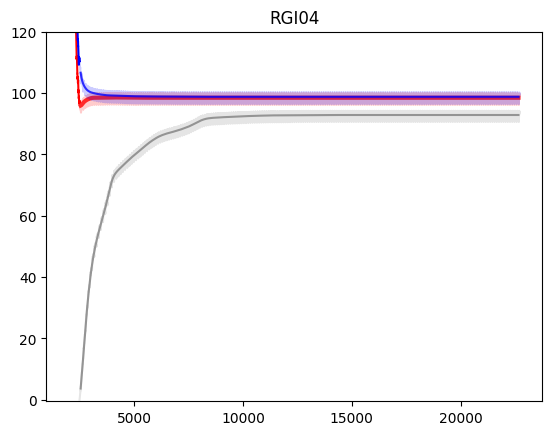

/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 785 times more chunks
  return self.array[key]


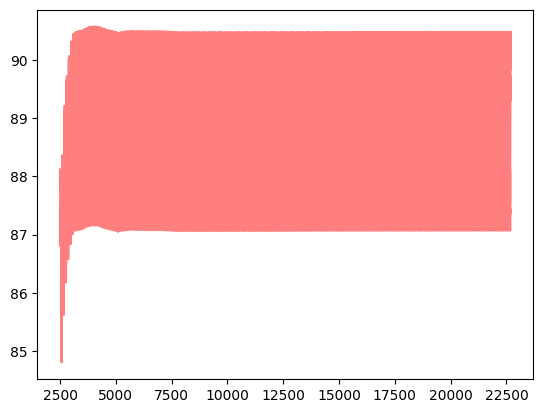

In [20]:
plt.plot(np.arange(2500,20201+2500,1),dr30OS15.sel(rgi_id=rgi_w).sum(dim='rgi_id').volume/init_vol, color='red', alpha = 0.5)


/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 785 times more chunks
  return self.array[key]


ValueError: x and y must have same first dimension, but have shapes (15201,) and (17702,)

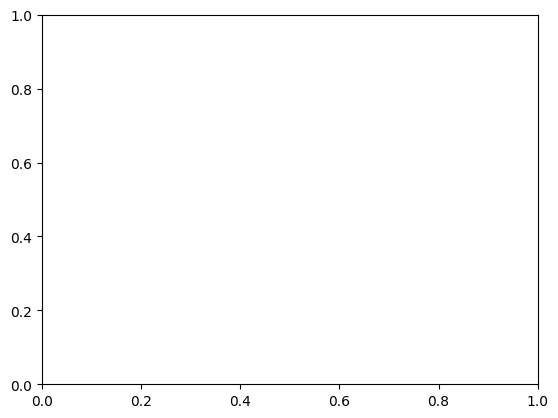

In [17]:
    plt.plot(np.arange(2500,20201-2500,1),dr30OS15.sel(rgi_id=rgi_w).sum(dim='rgi_id').volume.sel(time=slice(0,20201-2500))/init_vol, color='red', alpha = 0.5)


**OLD**

/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 774 times more chunks
  return self.array[key]
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 774 times more chunks
  return self.array[key]
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 774 times more chunks
  return self.array[key]


(1000000000000.0, 1500000000000.0)

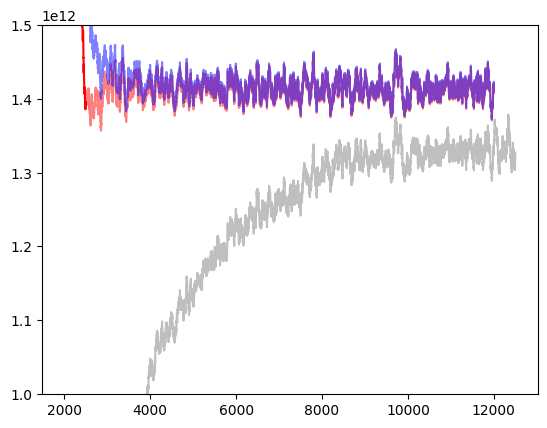

In [39]:
plt.plot(d30OS15.time, d30OS15.sel(rgi_id=rgi_w).sum(dim='rgi_id'), color='red')
plt.plot(d15.time, d15.sel(rgi_id=rgi_w).sum(dim='rgi_id'), color='blue')

plt.plot(np.arange(2500,12001,1),dr30OS15.sel(rgi_id=rgi_w).sum(dim='rgi_id').volume, color='red', alpha = 0.5)
#plt.plot(np.arange(2500,7001,1),dr25OS15.sel(rgi_id=rgi_w).sum(dim='rgi_id').volume, color='orange', alpha = 0.5)
#plt.plot(np.arange(2500,7001,1),dr20OS15.sel(rgi_id=rgi_w).sum(dim='rgi_id').volume, color='cyan', alpha = 0.5)
plt.plot(np.arange(2500,12001,1),
         dr15.sel(rgi_id=rgi_w).sum(dim='rgi_id').volume, color='blue', alpha = 0.5)
plt.plot(np.arange(2500,12501,1),
         drzero_initial.sel(rgi_id=rgi_w).sum(dim='rgi_id').volume, color='grey', alpha = 0.5)
plt.ylim([1e12,1.5e12])


In [ ]:
pd.Series()

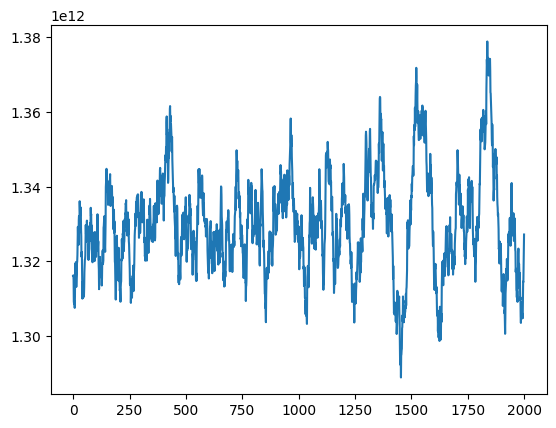

In [34]:
plt.plot(drzero_initial.sel(time=slice(8000,10000)).volume.sum(dim='rgi_id').values)

In [68]:
dr = xr.open_dataset('output/RGI04/run_random_climate_from2500_using2399_2499_gfdl-esm2m_stab_T30_endyr_2500_bc_1980_2019_rgi04_3000_4000.nc')

In [69]:
dr

<xarray.Dataset>
Dimensions:         (time: 4501, rgi_id: 1000)
Coordinates:
  * time            (time) float64 0.0 1.0 2.0 ... 4.498e+03 4.499e+03 4.5e+03
  * rgi_id          (rgi_id) object 'RGI60-04.03008' ... 'RGI60-04.04007'
    hydro_year      (time) int64 ...
    hydro_month     (time) int64 ...
    calendar_year   (time) int64 ...
    calendar_month  (time) int64 ...
Data variables:
    volume          (time, rgi_id) float32 ...
    volume_bsl      (time, rgi_id) float32 ...
    area            (time, rgi_id) float32 ...
    length          (time, rgi_id) float32 ...
    calving         (time, rgi_id) float32 ...
    calving_rate    (time, rgi_id) float32 ...
    water_level     (rgi_id) float32 ...
    glen_a          (rgi_id) float32 ...
    fs              (rgi_id) float32 ...
Attributes:
    description:    OGGM model output
    oggm_version:   1.6.1.dev26+gf8a1745
    calendar:       365-day no leap
    creation_date:  2023-08-11 12:30:14

In [1]:
#pip install --no-deps "git+https://github.com/OGGM/oggm.git@f8a1745d75a2921a44a6ef3ebc93757664b894ba"


In [1]:
#pip install shapely


In [1]:
import os
import logging 
import sys

# Libs
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# Locals
import oggm.cfg as cfg
from oggm import utils, workflow, tasks
# from oggm.shop import gcm_climate
import logging
# Module logger
log = logging.getLogger(__name__)
from oggm import entity_task

from func_add import run_hydro_from_2000_ref_area_2000_hist_w5e5_w_overshot_stab_scenarios


# normally from oggm.shop.gcm_climate import process_cmip_data
# but the changes are not yet updated ...
from oggm.shop.gcm_climate import process_gcm_data, process_cmip_data

# will run the stabilisation scenario separately 
only_stab = False
if only_stab:
    scenarios = ['stab_T12']
else:
    scenarios = ['stab_T12',
                 'stab_T15',
                 'oversh_T20OS15',
                 'oversh_T25OS15',
                 'oversh_T30OS15',
                 'stab_T20',
                 'stab_T25',
                 'stab_T30']

###########
    
# Initialize OGGM and set up the default run parameters
cfg.initialize(logging_level='ERROR')
rgi_version = '62'

cfg.PARAMS['border'] = 160 # changed for OGGM v16

# I got a strange KeyError: 'dl_verify_data_cluster.klima.uni-bremen.de' (only for RGI reg 03 and  'gfdl-esm4' 'ssp370')
cfg.PARAMS['dl_verify'] = False 
cfg.PARAMS['continue_on_error'] = True
cfg.PARAMS['use_multiprocessing']=True
cfg.PARAMS['store_model_geometry'] = True
       

2023-08-11 11:06:47: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2023-08-11 11:06:47: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2023-08-11 11:06:47: oggm.cfg: Multiprocessing: using all available processors (N=32)
2023-08-11 11:06:47: oggm.cfg: PARAMS['border'] changed from `80` to `160`.
2023-08-11 11:06:47: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.
2023-08-11 11:06:47: oggm.cfg: Multiprocessing switched ON after user settings.
2023-08-11 11:06:47: oggm.cfg: PARAMS['store_model_geometry'] changed from `False` to `True`.


In [2]:
    
# Local working directory (where OGGM will write its output)
#WORKING_DIR = os.environ.get('OGGM_WORKDIR', '')
#if not WORKING_DIR:
#    raise RuntimeError('Need a working dir')
#utils.mkdir(WORKING_DIR)
cfg.PATHS['working_dir'] = 'test_workdir'

OUTPUT_DIR = 'test_output'  #os.environ.get('OGGM_OUTDIR', '')
#if not OUTPUT_DIR:
#    raise RuntimeError('Need an output dir')
#utils.mkdir(OUTPUT_DIR)



rgi_reg = '01' #str(sys.argv[1])

OGGM_GLACIER_JOB = 1 #os.environ.get('OGGM_GLACIER_JOB', '')
test = True
if test:
    n_glacier=8
else:
    n_glacier = 1000
id0 = (int(OGGM_GLACIER_JOB)-1)*n_glacier
id1 = (int(OGGM_GLACIER_JOB))*n_glacier
print(id0,id1)


0 8


In [3]:
import oggm

In [4]:
oggm.__version__

'1.6.1.dev26+gf8a1745'

In [5]:
import shapely

In [6]:
shapely.__version__

'2.0.1'

In [7]:


#if rgi_reg not in ['{:02d}'.format(r) for r in range(1, 20)]:
#    raise RuntimeError('Need an RGI Region')

# Module logger
log = logging.getLogger(__name__)
log.workflow(f'Starting run for RGI reg {rgi_reg}: glaciers [{id0}:{id1}]')    

# RGI glaciers
rgi_ids = gpd.read_file(utils.get_rgi_region_file(rgi_reg, version=rgi_version))
if rgi_reg == '05':
    log.workflow('Remove connectivity 2  glaciers')
    rgi_ids = rgi_ids.loc[(rgi_ids['Connect'] == 0) | (rgi_ids['Connect'] ==1)]
rgi_ids = rgi_ids[id0:id1]    


# Go - get the pre-processed glacier directories
# TODO -> need to change the preprocessed directory to that here when it is available ... 
base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2023.3/elev_bands/W5E5_spinup/'
# old v2023.1 version: base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2023.1/elev_bands/W5E5_spinup'
gdirs = workflow.init_glacier_directories(rgi_ids, from_prepro_level=5, prepro_border=160,
                                          prepro_base_url=base_url, prepro_rgi_version=rgi_version)

ALL_DIAGS = ['volume', 'volume_bsl', #'volume_bwl',
             'area', 'length',  'calving', 'calving_rate',
             'off_area', 'on_area', 'melt_off_glacier',
             'melt_on_glacier', 'liq_prcp_off_glacier', 'liq_prcp_on_glacier',
             'snowfall_off_glacier', 'snowfall_on_glacier', 'model_mb',
             'residual_mb', 'snow_bucket']
# Add debug vars
cfg.PARAMS['store_diagnostic_variables'] = ALL_DIAGS

gdirs = workflow.init_glacier_directories(rgi_ids, from_prepro_level=5, prepro_border=160,
                                              prepro_base_url=base_url, prepro_rgi_version=rgi_version)


dir_path = 'https://cluster.klima.uni-bremen.de/~lschuster/provide/gfdl-esm2m_oversh_stab_uni_bern/flat/2023.2'

for scenario in scenarios:

    fp = f'{dir_path}/gfdl-esm2m_{scenario}_pr_global_monthly_flat_glaciers.nc'
    ft = f'{dir_path}/gfdl-esm2m_{scenario}_tas_global_monthly_flat_glaciers.nc'
    ft = utils.file_downloader(ft)
    fp = utils.file_downloader(fp)
    rid = f'_gfdl-esm2m_{scenario}_endyr_2500_bc_2000_2019'
    workflow.execute_entity_task(process_cmip_data, gdirs, 
                                 filesuffix=rid,  # recognize the climate file for later
                                 fpath_temp=ft,  # temperature projections
                                 fpath_precip=fp,  # precip projections
                                 year_range=('2000', '2019'),
                                 y0=2000-10,y1=2500) # new this makes the processing a bit faster
    
    rid = f'_gfdl-esm2m_{scenario}_endyr_2500_bc_1980_2019'
    workflow.execute_entity_task(process_cmip_data, gdirs, 
                                 filesuffix=rid,  # recognize the climate file for later
                                 fpath_temp=ft,  # temperature projections
                                 fpath_precip=fp,  # precip projections
                                 year_range=('1980', '2019'),
                                 y0=1980-20,y1=2500,  # new this makes the processing a bit faster
                                 )
 

2023-08-11 11:06:49: __main__: Starting run for RGI reg 01: glaciers [0:8]
2023-08-11 11:06:57: oggm.workflow: init_glacier_directories from prepro level 5 on 8 glaciers.
2023-08-11 11:06:57: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 8 glaciers
2023-08-11 11:06:58: oggm.cfg: PARAMS['store_diagnostic_variables'] changed from `['volume', 'volume_bsl', 'volume_bwl', 'area', 'length', 'calving', 'calving_rate', 'off_area', 'on_area', 'melt_off_glacier', 'melt_on_glacier', 'liq_prcp_off_glacier', 'liq_prcp_on_glacier', 'snowfall_off_glacier', 'snowfall_on_glacier']` to `['volume', 'volume_bsl', 'area', 'length', 'calving', 'calving_rate', 'off_area', 'on_area', 'melt_off_glacier', 'melt_on_glacier', 'liq_prcp_off_glacier', 'liq_prcp_on_glacier', 'snowfall_off_glacier', 'snowfall_on_glacier', 'model_mb', 'residual_mb', 'snow_bucket']`.
2023-08-11 11:06:58: oggm.workflow: init_glacier_directories from prepro level 5 on 8 glaciers.
2023-08-11 11:06:58: oggm.workflow: Execute en

In [8]:
workflow.execute_entity_task(run_hydro_from_2000_ref_area_2000_hist_w5e5_w_overshot_stab_scenarios, gdirs, scenarios=scenarios)

# compile and store run output
eq_dir = os.path.join(OUTPUT_DIR, 'RGI' + rgi_reg)
utils.mkdir(eq_dir)
for scenario in scenarios:
    rid = f'_gfdl-esm2m_{scenario}_endyr_2500_bc_2000_2019'
    utils.compile_run_output(gdirs, input_filesuffix=f'_merged_from_2000_run{rid}', 
                            path=os.path.join(eq_dir, f'run_hydro_w5e5_gcm_merged_from_2000{rid}_rgi{rgi_reg}_{id0}_{id1}.nc'))
    
    rid = f'_gfdl-esm2m_{scenario}_endyr_2500_bc_1980_2019'
    utils.compile_run_output(gdirs, input_filesuffix=f'_merged_from_2000_run{rid}', 
                            path=os.path.join(eq_dir, f'run_hydro_w5e5_gcm_merged_from_2000{rid}_rgi{rgi_reg}_{id0}_{id1}.nc'))
 
log.workflow('OGGM Done')

2023-08-11 11:07:23: oggm.workflow: Execute entity tasks [run_hydro_from_2000_ref_area_2000_hist_w5e5_w_overshot_stab_scenarios] on 8 glaciers
2023-08-11 11:08:10: oggm.utils: Applying global task compile_run_output on 8 glaciers
2023-08-11 11:08:10: oggm.utils: Applying compile_run_output on 8 gdirs.
2023-08-11 11:08:11: oggm.utils: Applying global task compile_run_output on 8 glaciers
2023-08-11 11:08:11: oggm.utils: Applying compile_run_output on 8 gdirs.
2023-08-11 11:08:11: oggm.utils: Applying global task compile_run_output on 8 glaciers
2023-08-11 11:08:11: oggm.utils: Applying compile_run_output on 8 gdirs.
2023-08-11 11:08:11: oggm.utils: Applying global task compile_run_output on 8 glaciers
2023-08-11 11:08:11: oggm.utils: Applying compile_run_output on 8 gdirs.
2023-08-11 11:08:12: oggm.utils: Applying global task compile_run_output on 8 glaciers
2023-08-11 11:08:12: oggm.utils: Applying compile_run_output on 8 gdirs.
2023-08-11 11:08:12: oggm.utils: Applying global task com

In [45]:
run_steady_state = True

In [51]:
for gdir in gdirs[:2]:
    tasks.run_with_hydro(gdir, run_task=tasks.run_from_climate_data,
                     climate_filename='climate_historical',
                     ys=2000, init_model_yr=2000,
                     store_monthly_hydro=True,
                     init_model_filesuffix='_spinup_historical',
                     ref_geometry_filesuffix='_spinup_historical',
                     ref_area_yr = 2000,
                     output_filesuffix='_historical_from_2000_run')
    
    for scenario in scenarios:
        if not run_steady_state:
            rid = f'_gfdl-esm2m_{scenario}_endyr_2500_bc_2000_2019'
            tasks.run_with_hydro(gdir,
                     run_task=tasks.run_from_climate_data,
                                 ys=2020, # this is important! Start from 2020 glacier
                                 ye=2499,
                     # use gcm_data, not climate_historical
                     climate_filename='gcm_data',
                     # use the chosen scenario
                     climate_input_filesuffix=rid,
                     # we start from the previous run, 
                     init_model_filesuffix='_historical_from_2000_run',
                     ref_geometry_filesuffix='_historical_from_2000_run', 
                     ref_area_yr = 2000,
                     # recognize the run for later
                     output_filesuffix=f'_future_run{rid}',
                     # add monthly diagnostics
                     store_monthly_hydro=True);


            utils.merge_consecutive_run_outputs(gdir,
                                    input_filesuffix_1='_historical_from_2000_run',
                                    input_filesuffix_2=f'_future_run{rid}',
                                    output_filesuffix=f'_merged_from_2000_run{rid}',
                                    delete_input=False,
                                   ) # we will delete that later

      
        rid = f'_gfdl-esm2m_{scenario}_endyr_2500_bc_1980_2019'
        tasks.run_with_hydro(gdir,
                 run_task=tasks.run_from_climate_data,
                             ys=2020, # this is important! Start from 2020 glacier
                             ye=2499,
                 # use gcm_data, not climate_historical
                 climate_filename='gcm_data',
                 # use the chosen scenario
                 climate_input_filesuffix=rid,
                 # we start from the previous run, 
                 init_model_filesuffix='_historical_from_2000_run',
                 ref_geometry_filesuffix='_historical_from_2000_run', 
                 ref_area_yr = 2000,
                 # recognize the run for later
                 output_filesuffix=f'_future_run{rid}',
                 # add monthly diagnostics
                 store_monthly_hydro=True);
        utils.merge_consecutive_run_outputs(gdir,
                                input_filesuffix_1='_historical_from_2000_run',
                                input_filesuffix_2=f'_future_run{rid}',
                                output_filesuffix=f'_merged_from_2000_run{rid}',
                                delete_input=False,
                               ) # we will delete that later
        if run_steady_state:
            tasks.run_random_climate(gdir, nyears=4500, y0=2449, halfsize=50,
                         init_model_yr=2499,
                           seed=42,
                           climate_filename='gcm_data',
                             # use the chosen scenario
                             climate_input_filesuffix=rid,
                             # we start from the previous run, 
                             init_model_filesuffix=f'_future_run{rid}',
                            output_filesuffix=f'_steady_state_random_run_2399_2499{rid}',
                                          unique_samples=True)
            print(scenario)


stab_T12
stab_T15
oversh_T20OS15
oversh_T25OS15
oversh_T30OS15
stab_T20
stab_T25
stab_T30
stab_T12
stab_T15
oversh_T20OS15
oversh_T25OS15
oversh_T30OS15
stab_T20
stab_T25
stab_T30


In [52]:
# compile and store run output
eq_dir = os.path.join(OUTPUT_DIR, 'RGI' + rgi_reg)
utils.mkdir(eq_dir)
for scenario in scenarios:
    if not run_steady_state:
        rid = f'_gfdl-esm2m_{scenario}_endyr_2500_bc_2000_2019'
        utils.compile_run_output(gdirs, input_filesuffix=f'_merged_from_2000_run{rid}', 
                                path=os.path.join(eq_dir, f'run_hydro_w5e5_gcm_merged_from_2000{rid}_rgi{rgi_reg}_{id0}_{id1}.nc'))
    
    rid = f'_gfdl-esm2m_{scenario}_endyr_2500_bc_1980_2019'
    utils.compile_run_output(gdirs, input_filesuffix=f'_merged_from_2000_run{rid}', 
                            path=os.path.join(eq_dir, f'run_hydro_w5e5_gcm_merged_from_2000{rid}_rgi{rgi_reg}_{id0}_{id1}.nc'))
 
    if run_steady_state:
        rid = f'_gfdl-esm2m_{scenario}_endyr_2500_bc_1980_2019'
        utils.compile_run_output(gdirs, input_filesuffix=f'_steady_state_random_run_2399_2499{rid}', 
                            path=os.path.join(eq_dir, f'run_random_climate_from2500_using2399_2499{rid}_rgi{rgi_reg}_{id0}_{id1}.nc'))

2023-08-11 12:08:19: oggm.utils: Applying global task compile_run_output on 8 glaciers
2023-08-11 12:08:19: oggm.utils: Applying compile_run_output on 8 gdirs.
2023-08-11 12:08:19: oggm.utils: Applying global task compile_run_output on 8 glaciers
2023-08-11 12:08:19: oggm.utils: Applying compile_run_output on 8 gdirs.
2023-08-11 12:08:19: oggm.utils: Applying global task compile_run_output on 8 glaciers
2023-08-11 12:08:19: oggm.utils: Applying compile_run_output on 8 gdirs.
2023-08-11 12:08:19: oggm.utils: Applying global task compile_run_output on 8 glaciers
2023-08-11 12:08:19: oggm.utils: Applying compile_run_output on 8 gdirs.
2023-08-11 12:08:19: oggm.utils: Applying global task compile_run_output on 8 glaciers
2023-08-11 12:08:19: oggm.utils: Applying compile_run_output on 8 gdirs.
2023-08-11 12:08:20: oggm.utils: Applying global task compile_run_output on 8 glaciers
2023-08-11 12:08:20: oggm.utils: Applying compile_run_output on 8 gdirs.
2023-08-11 12:08:20: oggm.utils: Applyin

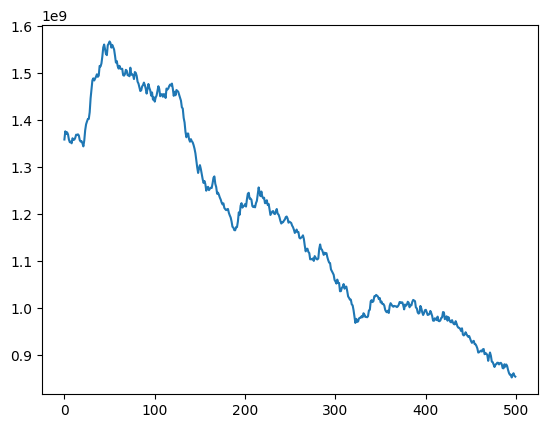

<xarray.DataArray 'volume' (time: 500, rgi_id: 3)>
array([[ 7033596. , 22759032. , 66254324. ],
       [ 7413937.5, 23131022. , 66352084. ],
       [ 7300252. , 22779244. , 64430336. ],
       ...,
       [  920350.1,        0. ,        0. ],
       [  843871.2,        0. ,        0. ],
       [  832258.5,        0. ,        0. ]], dtype=float32)
Coordinates:
  * time            (time) float64 2e+03 2.001e+03 ... 2.498e+03 2.499e+03
  * rgi_id          (rgi_id) object 'RGI60-01.00001' ... 'RGI60-01.00003'
    hydro_year      (time) int64 ...
    hydro_month     (time) int64 ...
    calendar_year   (time) int64 ...
    calendar_month  (time) int64 ...
Attributes:
    description:  Total glacier volume
    unit:         m 3

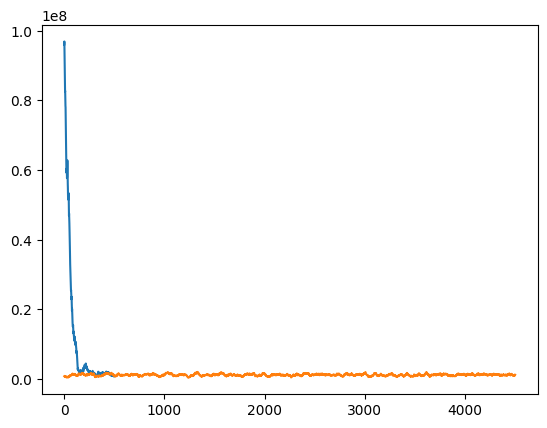

In [65]:
plt.plot(xr.open_dataset(os.path.join(eq_dir, f'run_hydro_w5e5_gcm_merged_from_2000{rid}_rgi{rgi_reg}_{id0}_{id1}.nc')).volume.isel(rgi_id=slice(0,3)).sum(dim='rgi_id'))

plt.plot(xr.open_dataset(os.path.join(eq_dir, f'run_random_climate_from2500_using2399_2499{rid}_rgi{rgi_reg}_{id0}_{id1}.nc')).volume.sum(dim='rgi_id'))

In [56]:
rid

'_gfdl-esm2m_stab_T30_endyr_2500_bc_1980_2019'

In [ ]:
import cftime
cftime_l = []
for y in np.arange(2500,10000,1):
    for m in np.arange(1,12,1):
        cftime_l.append(cftime.DatetimeNoLeap(y,m,15))
        
new_data = xr.DataArray(data=None, coords={'time': cftime_l}, dims=['time'])
new_data_t = new_data.to_dataset('time')

fp_t = gdir.get_filepath('gcm_data',filesuffix=rid)
ds = xr.open_dataset(fp_t, use_cftime=True)

In [68]:
import xarray as xr

import numpy as np
import pandas as pd

In [96]:
ds =xr.open_dataset('2023.2/gfdl-esm2m_oversh_T20OS15_pr_global_monthly_flat_glaciers.nc')

In [97]:
ds.isel(points=0)

<xarray.Dataset>
Dimensions:  (time: 7668)
Coordinates:
  * time     (time) object 1861-01-16 12:00:00 ... 2499-12-16 12:00:00
Data variables:
    lat      float64 ...
    lon      float64 ...
    pr       (time) float32 ...
Attributes:
    history:                   longitudes to 0 -> 360,  only glacier gridpoin...
    info:                      gfdl-esm2m: oversh_T20OS15, University of Bern...
    postprocessing_date:       2023-04-01
    postprocessing_scientist:  lilian.schuster@uibk.ac.at
    version:                   2023.2

In [99]:
new_data = xr.DataArray(data=None, coords={'time': cftime_l}, dims=['time'])
ds_pr = xr.concat([ds.pr, new_data], dim='time')

In [ ]:
ds.pr[-12*100:].values

In [103]:
ds_pr[-12*100:]

<xarray.DataArray 'pr' (time: 1200, points: 756)>
array([[None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       ...,
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None]], dtype=object)
Coordinates:
  * time     (time) object 9890-11-15 00:00:00 ... 9999-11-15 00:00:00
Dimensions without coordinates: points
Attributes:
    time_avg_info:  average_T1,average_T2,average_DT
    long_name:      Total precipitation rate
    cell_methods:   time: mean
    interp_method:  conserve_order1
    units:          kg m-2 s-1
    coordinates:    latitude time_ longitude

In [100]:
ds = ds.drop('pr')
ds['pr'] = ds_pr.astype(float)

In [101]:
ds.isel(points=0)

<xarray.Dataset>
Dimensions:  (time: 7668)
Coordinates:
  * time     (time) object 1861-01-16 12:00:00 ... 2499-12-16 12:00:00
Data variables:
    lat      float64 ...
    lon      float64 ...
    pr       (time) float64 1.56e-05 2.696e-06 1.525e-05 ... 5.42e-06 1.393e-05
Attributes:
    history:                   longitudes to 0 -> 360,  only glacier gridpoin...
    info:                      gfdl-esm2m: oversh_T20OS15, University of Bern...
    postprocessing_date:       2023-04-01
    postprocessing_scientist:  lilian.schuster@uibk.ac.at
    version:                   2023.2

<xarray.DataArray 'pr' (time: 7668, points: 756)>
array([[1.55995167e-05, 1.48247282e-05, 1.84802957e-05, ...,
        5.93577624e-06, 6.40878034e-06, 6.94964228e-06],
       [2.69581255e-06, 2.57210945e-06, 3.14807148e-05, ...,
        4.99445332e-06, 5.20852836e-06, 5.06661991e-06],
       [1.52539324e-05, 1.54070931e-05, 1.11780764e-05, ...,
        2.89672198e-06, 3.27416251e-06, 3.62486139e-06],
       ...,
       [6.37151516e-06, 6.22194057e-06, 1.73304659e-06, ...,
        2.60410388e-06, 2.63645097e-06, 2.63979382e-06],
       [5.41985355e-06, 5.46674210e-06, 3.36134212e-06, ...,
        3.09347024e-06, 2.88882757e-06, 2.75815319e-06],
       [1.39322583e-05, 1.25384340e-05, 8.18079843e-06, ...,
        6.79784262e-06, 7.05494449e-06, 7.10042650e-06]])
Coordinates:
  * time     (time) object 1861-01-16 12:00:00 ... 2499-12-16 12:00:00
Dimensions without coordinates: points
Attributes:
    time_avg_info:  average_T1,average_T2,average_DT
    long_name:      Total precipitation rate
    cell_methods:   time: mean
    interp_method:  conserve_order1
    units:          kg m-2 s-1
    coordinates:    latitude time_ longitude

In [37]:
ds.update({'pr':(('time',),new_data)})

TypeError: Using a DataArray object to construct a variable is ambiguous, please extract the data using the .data property.

In [32]:
ds.time.isel(time=-1)


<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(2499, 12, 16, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 2499-12-16 12:00:00
Attributes:
    long_name:      time
    axis:           T
    standard_name:  time
    bounds:         time_bnds